In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [45]:
class sample_averages_bandit:
    def __init__(self, epsilon, k):
        self.epsilon = epsilon
        self.k = k
        self.q_estimates = np.zeros(k)
        self.actions = np.array(range(k))
        self.action_rewards = np.zeros([])
        self.q_true = np.random.randn(k)
        self.times_taken = np.zeros(k)
        self.time = 0

    
    # Returns the index of the action selected
    def select_action(self):
        x = np.random.uniform()
        if x < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return np.argmax(self.q_estimates)
    
    # Get reward and update q_estimate using sample-average method
    def act(self, action):
        # Get return for action
        reward = np.random.normal(self.q_true[action], 1)
        
        # Increment t, times_taken[action]
        self.time += 1
        self.times_taken[action] += 1

        # Use Sample-averages method to update q_estimate
        self.q_estimates[action] += 1.0/self.times_taken[action] * (reward - self.q_estimates[action])
        
        return reward
    
    # Reset bandit at the beginning of every run
    def reset(self):
        
        self.q_true = np.random.randn(self.k)
        
        self.q_estimates = np.zeros(self.k)
        
        self.times_taken = np.zeros(self.k)
        
        self.best_action = np.argmax(self.q_true)
    
def simulate(runs, time, bandits):
    best_action_counts = np.zeros((len(bandits), runs, time))
    rewards = np.zeros(best_action_counts.shape)
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            for t in range(time):
                action = bandit.select_action()
                reward = bandit.act(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    best_action_counts = best_action_counts.mean(axis = 1)
    rewards = rewards.mean(axis = 1)
    return best_action_counts, rewards
        

In [46]:
def figure_2_2(runs=2000, time=1000):
    epsilons = [0, 0.1, 0.01]
    bandits = [sample_averages_bandit(epsilon=eps, k = 10) for eps in epsilons]
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for eps, rewards in zip(epsilons, rewards):
        plt.plot(rewards, label='epsilon = %.02f' % (eps))
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()

    plt.subplot(2, 1, 2)
    for eps, counts in zip(epsilons, best_action_counts):
        plt.plot(counts, label='epsilon = %.02f' % (eps))
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    
    plt.show()


100%|██████████| 2000/2000 [00:13<00:00, 145.82it/s]


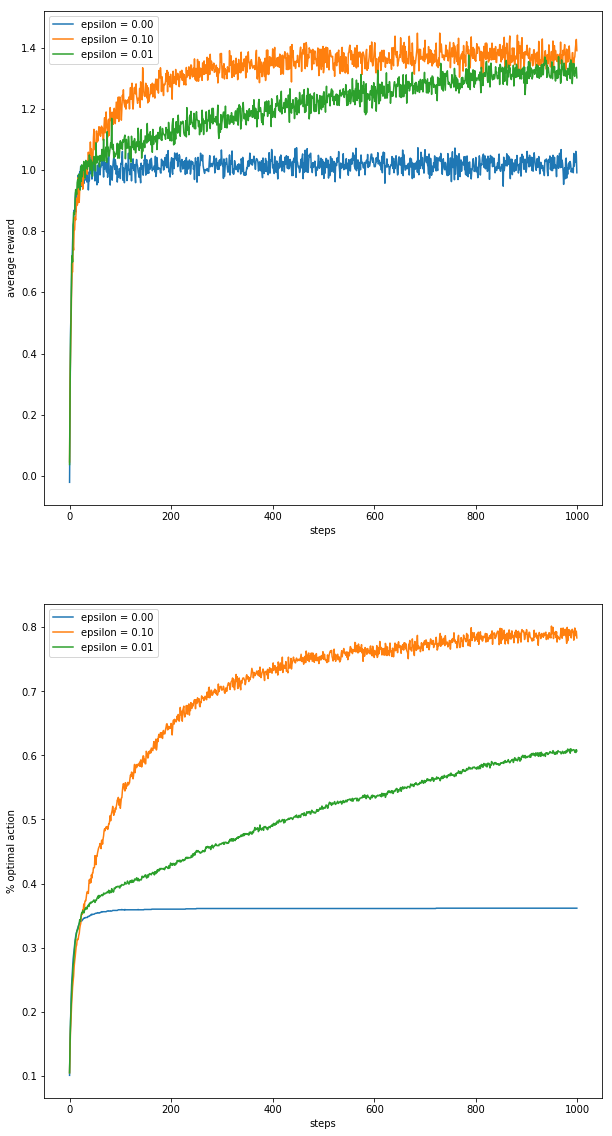

In [48]:
if __name__ == '__main__':
    figure_2_2()